**Digit Recognization** - AI Mini project

> By - **SHREYASH SHANTANU**



---



Importing the important libaries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

Loading the MNIST dataset

In [2]:
(X_train,y_train),(X_test,y_test) = tf.keras.datasets.mnist.load_data(path="mnist.npz")

11493376/11490434 [==============================] - 0s 0us/step


Previewing an example

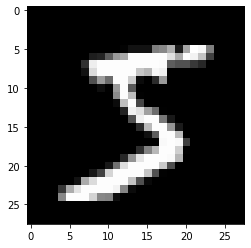

In [3]:
plt.imshow(X_train[0],cmap='gray')

This digit is

In [4]:
y_train[0]

5

Checking size of our ndarrays

In [5]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [6]:
np.unique(y_train,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))

In [7]:
np.unique(y_test,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([ 980, 1135, 1032, 1010,  982,  892,  958, 1028,  974, 1009]))

Normalizing the dataset

In [8]:
X_train = X_train/255
X_test = X_test/255

Number of neuron units for hidden layer

In [9]:
(28*28)/2

392.0

Creating the ANN model

In [10]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(392,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

Compiling the model

In [11]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

Fitting the train set in model

In [12]:
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2107 - accuracy: 0.9389
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0851 - accuracy: 0.9743
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0561 - accuracy: 0.9823
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0399 - accuracy: 0.9876
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0288 - accuracy: 0.9904
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0227 - accuracy: 0.9927
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0182 - accuracy: 0.9943
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0142 - accuracy: 0.9956
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0127 - accuracy: 0.9957
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.010

Predicting the values for X_test

In [13]:
y_pred = np.argmax(model.predict(X_test),axis=-1)
y_pred

array([7, 2, 1, ..., 4, 5, 6])

Real test set

In [14]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

Checking the accuracy of the model

In [15]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_test,y_pred)

0.98

Confusion matrix of the model

In [16]:
confusion_matrix(y_test,y_pred)

array([[ 972,    0,    1,    0,    0,    1,    2,    1,    2,    1],
       [   0, 1130,    0,    0,    0,    0,    2,    1,    2,    0],
       [   4,    2, 1008,    3,    0,    0,    2,    4,    8,    1],
       [   0,    0,    7,  982,    0,   11,    0,    2,    2,    6],
       [   2,    3,    3,    0,  949,    0,    6,    1,    1,   17],
       [   3,    0,    0,    7,    1,  867,    4,    1,    8,    1],
       [   3,    2,    0,    0,    3,    1,  949,    0,    0,    0],
       [   1,    5,    6,    2,    0,    0,    0, 1000,    7,    7],
       [   8,    1,    4,    3,    0,    0,    1,    0,  954,    3],
       [   2,    2,    2,    2,    2,    2,    0,    3,    5,  989]])

Saving the model

In [17]:
model.save('Digit_recong.h5')